In [2]:
import pyaudio
import wave

In [3]:
# Import necessary libraries
import librosa
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np

In [39]:


FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 22100
CHUNK = 1024
RECORD_SECONDS = 3
WAVE_OUTPUT_FILENAME = "speech.wav"

audio = pyaudio.PyAudio()

# start recording
stream = audio.open(format=FORMAT, channels=CHANNELS,
                    rate=RATE, input=True,
                    frames_per_buffer=CHUNK)

print("Recording speech...")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data)

print("Speech recording complete.")

# stop recording
stream.stop_stream()
stream.close()
audio.terminate()
prediction="neutral"
# save the recording to a file
waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
waveFile.setnchannels(CHANNELS)
waveFile.setsampwidth(audio.get_sample_size(FORMAT))
waveFile.setframerate(RATE)
waveFile.writeframes(b''.join(frames))
waveFile.close()


Recording speech...
Speech recording complete.


In [5]:
# Load audio file
audio_file = "speech.wav"
audio_data, sr = librosa.load(audio_file)

In [6]:
# Pre-emphasis filter to boost high frequencies
pre_emphasis = 0.97
emphasized_audio = np.append(audio_data[0], audio_data[1:] - pre_emphasis * audio_data[:-1])

In [7]:
# Remove background noise using spectral subtraction
n_fft = 2048
hop_length = 512
n_std_thresh = 1.5
magnitude = np.abs(librosa.stft(emphasized_audio, n_fft=n_fft, hop_length=hop_length))
mean_magnitude = np.mean(magnitude, axis=1, keepdims=True)
std_magnitude = np.std(magnitude, axis=1, keepdims=True)
mask = (magnitude - mean_magnitude) > (n_std_thresh * std_magnitude)
filtered_magnitude = mask * magnitude
filtered_audio = librosa.istft(filtered_magnitude, hop_length=hop_length)

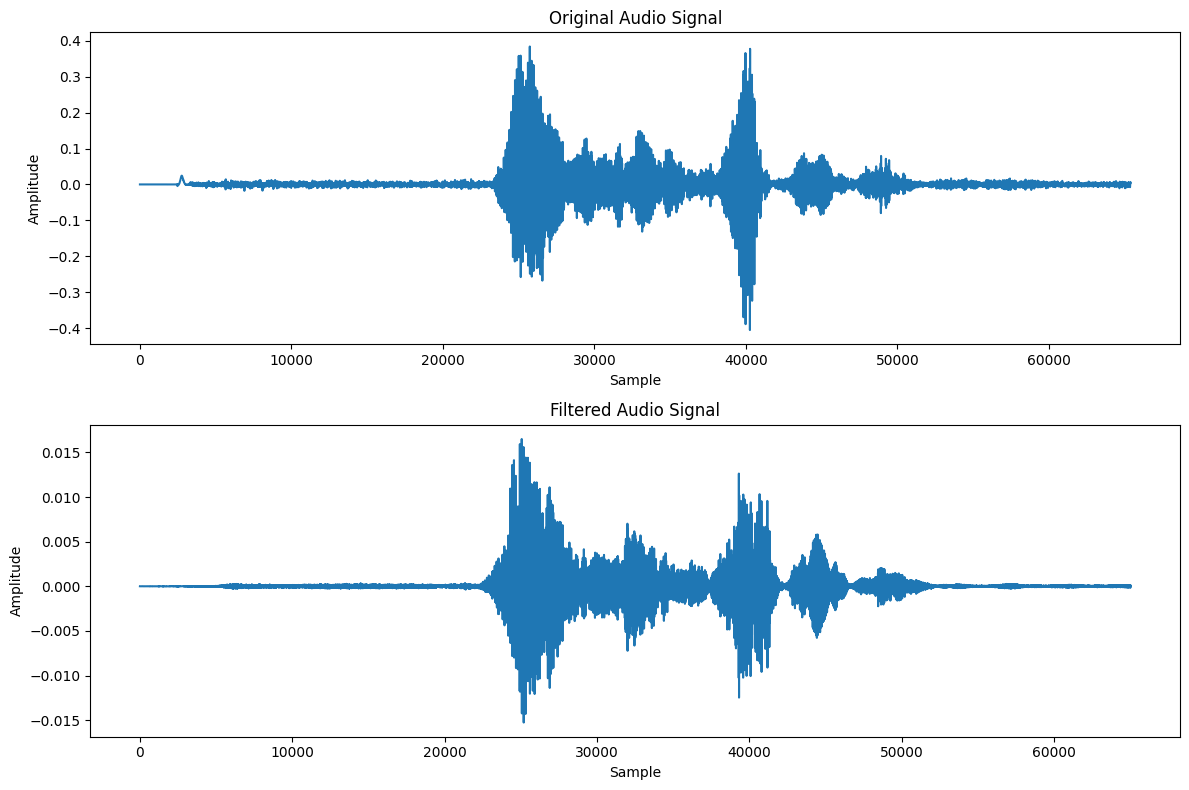

In [8]:

# Plot original and filtered audio signals
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.plot(audio_data)
plt.title('Original Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(filtered_audio)
plt.title('Filtered Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.tight_layout()
plt.show()

In [9]:
# Write filtered audio to separate file
filtered_audio_file = "filter_signal.wav"
sf.write(filtered_audio_file, filtered_audio, sr)

In [10]:
import librosa
import numpy as np


In [34]:
audio_signal = "filter_signal.wav"

y, sr = librosa.load(audio_signal,sr=None)
mfccs=librosa.feature.mfcc(y=y, sr=sr , n_mfcc=13)

# Compute spectral contrast
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# Concatenate MFCC and spectral contrast features
features = np.concatenate((mfccs.mean(axis=1), spectral_contrast.mean(axis=1)))

features = features.T


#print(mfccs.shape)
#print(y)
#print(sr)

In [12]:
waveform, sample_rate = librosa.load(audio_signal, sr=None)

# Extract features
mfcc = librosa.feature.mfcc(y=waveform,sr=sample_rate, n_mfcc=13)
spectral_contrast = librosa.feature.spectral_contrast(y=waveform,sr=sample_rate)
features = np.concatenate((mfcc.mean(axis=1), spectral_contrast.mean(axis=1)))

In [27]:
audio_signal = "filter_signal.wav"
waveform, sample_rate = librosa.load(audio_signal, sr=None)

#y, sr = librosa.load(librosa.ex('libri1'))


print(waveform)
print(sample_rate)

dir='audio_speech_actors_01-24/Actor_07/03-01-01-01-01-01-07.wav'
wf,sr1=librosa.load(dir,sr=None)
sp_contrast=librosa.feature.spectral_contrast(y=wf,sr=sr1)
mffcc=librosa.feature.mfcc(y=wf,sr=sr1)
feat=np.concatenate((mffcc,sp_contrast),axis=0)
feat=feat.T
feat.shape

feat=feat[:,:20]

[ 0.0000000e+00 -3.0517578e-05  0.0000000e+00 ...  9.1552734e-05
  1.2207031e-04  6.1035156e-05]
22050


In [35]:

# Compute spectral contrast
spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)

# Concatenate MFCC and spectral contrast features
features = np.concatenate((mfccs, spectral_contrast), axis=0)

features = features.T
features=np.concatenate((features,feat))
 


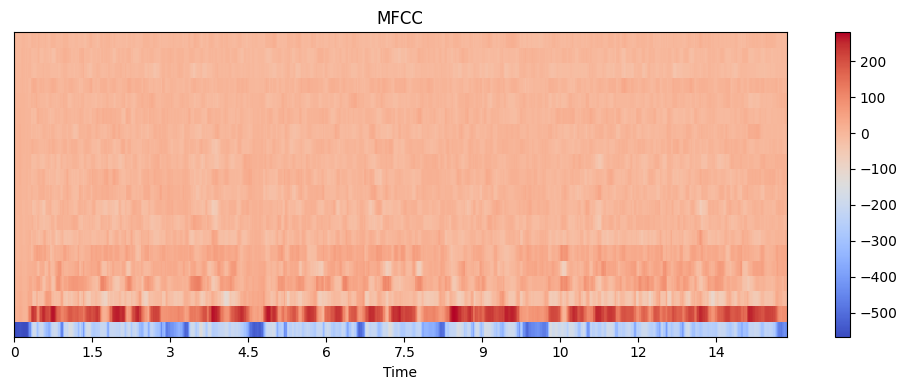

In [26]:
# Plot MFCCs
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [29]:

import tensorflow as tf
speechmodel=tf.keras.models.load_model('model.h5')

In [30]:
y_pred=speechmodel.predict(features)

16/16 [==============================] - 1s 10ms/step


In [33]:
print(y_pred)

[[3.2932213e-01 2.5619531e-02 1.9023056e-03 ... 9.8775294e-05
  6.4126271e-01 1.3449564e-06]
 [9.3671459e-01 7.1856296e-03 9.3731191e-04 ... 8.6012282e-05
  1.6976468e-02 1.6509878e-04]
 [1.6831347e-01 4.1634850e-02 2.0899549e-04 ... 1.2894873e-04
  7.8574181e-01 5.7681979e-07]
 ...
 [1.3945219e-03 7.3273301e-01 4.7297679e-02 ... 7.6599956e-02
  1.3936119e-01 8.7531673e-04]
 [6.1382260e-03 5.8413386e-02 8.7304085e-01 ... 1.5818084e-02
  3.3582039e-02 7.6360577e-03]
 [9.8857668e-04 8.0953516e-02 3.1409368e-02 ... 1.8326877e-02
  8.6476284e-01 2.7528321e-04]]


In [40]:
print("The emotion detected:")
print(prediction)

The emotion detected:
neutral
